In [243]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

In [244]:
def permutation():
    global order,N
    order = nr.permutation(N)

In [245]:
def vecinocuad(s,j):
    global L,empty

    if j == 0: #izquierda
        if s%L == L-1:
            return empty
        else:
            return s+1
        
    elif j==1: #arriba
        if s//L == L-1:
            return empty
        else:
            return s+L
        
    elif j==2: #derecha
        if s%L == 0:
            return empty
        else:
            return s-1
        
    elif j==3: #abajo
        if s//L == 0:
            return empty
        else:
            return s-L

In [246]:
def boundaries():
    global N,nn
    for s in range(N):
        for j in range(4):
            nn[s,j] = vecinocuad(s,j)

In [247]:
def findroot(r):
    global parent
    while parent[r] >= 0:
        r = parent[r]
    return r

In [248]:
def mergeroots(r1,r2):
    global spanclussize,parent,touchesLeft,touchesRight
    if r1 == r2:
        return r1
    elif -parent[r1] > -parent[r2]:
        parent[r1] += parent[r2]
        parent[r2] = r1
        touchesLeft[r1] = touchesLeft[r1] or touchesLeft[r2] 
        touchesRight[r1] = touchesRight[r1] or touchesRight[r2]
        if touchesLeft[r1] and touchesRight[r1]:
            spanclussize = -parent[r1]
        return r1 
    else:
        parent[r2] += parent[r1]
        parent[r1] = r2
        touchesLeft[r2] = touchesLeft[r2] or touchesLeft[r1]
        touchesRight[r2] = touchesRight[r2] or touchesRight[r1]
        if touchesLeft[r2] and touchesRight[r2]:
            spanclussize = -parent[r2]
        return r2  

In [249]:
def percolate():
    global spanclussize,order,parent,nn
    BIG = []
    PSpan = []
    big=0
    spanclussize = 0
    
    for i in range(N): parent[i]=empty    

    for i in range(N):
        r1=s1=order[i]
        parent[s1] = -1
                
        for j in range(4):
            s2=nn[s1, j]
            if s2 != empty:
                if parent[s2] != empty:
                    r1 = mergeroots(r1,findroot(s2))
                    if -parent[r1]>big: big=-parent[r1]
        BIG.append(big)
        PSpan.append(spanclussize/(i+1.))

    return np.array(BIG), np.array(PSpan)

In [250]:
global L, N, empty, parent, nn, order, spanclussize,touchesLeft,touchesRight

L = 128
N = L**2
empty=-(N+1)
muestras=100

bigprom=np.zeros(N)
Pspanprom=np.zeros(N)
Probprom=np.zeros(N)
nn=np.zeros((N, 4), dtype=int)
boundaries() 

for i in range (muestras):
    order=np.zeros(N, dtype=int) 
    parent=np.zeros(N, dtype=int) 
    touchesLeft =  [i%L == 0 for i in range(N)]
    touchesRight = [i%L == L-1 for i in range(N)]

    permutation()  
    BIG,PSpan=percolate()
    Prob = np.copy(PSpan)
    Prob[PSpan>0]=1

    bigprom+=BIG
    Pspanprom+=PSpan
    Probprom+=Prob

bigprom/=muestras
Pspanprom/=muestras
Probprom/=muestras


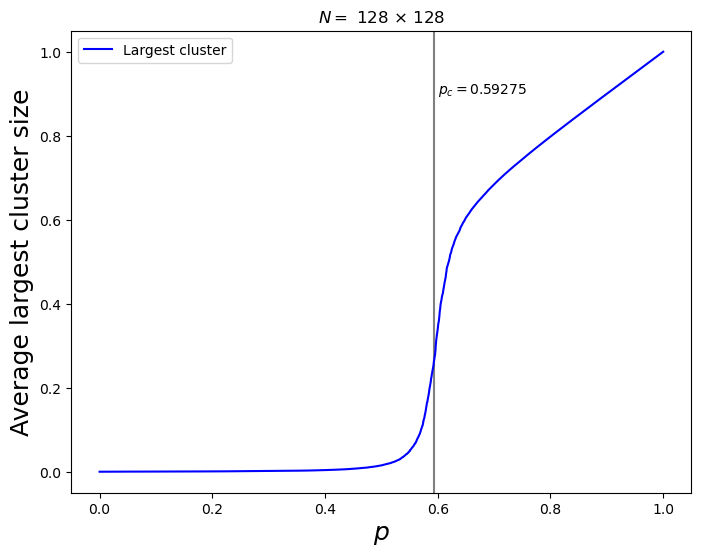

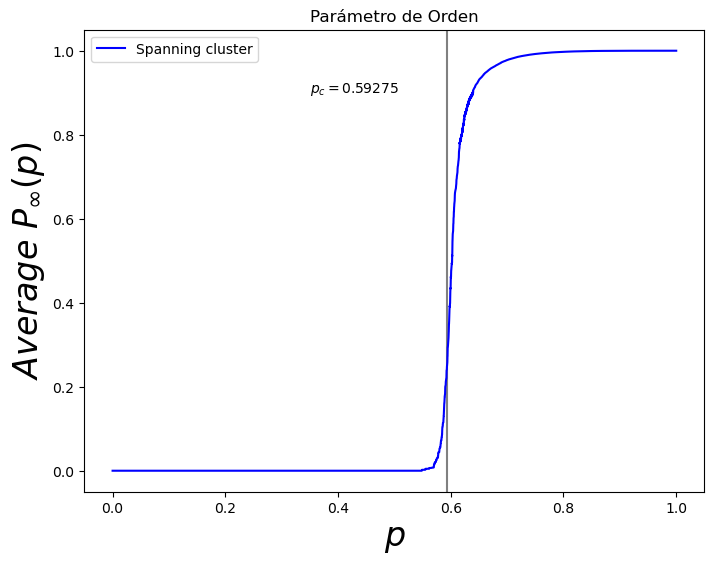

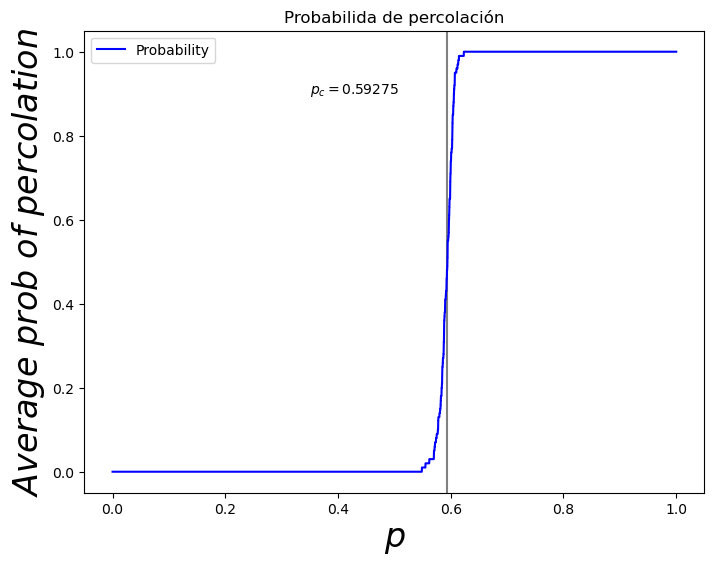

In [251]:
p = np.array(range(1,N+1))/N
plt.figure(figsize=(8,6))
bigprom/=N
plt.plot(p, bigprom, 'b-',label = "Largest cluster")
plt.xlabel(r"$p$",fontsize = 18)
plt.ylabel("Average largest cluster size",fontsize = 18)
plt.title(r"$N = $ {} $\times$ {}".format(L,L))
plt.axvline(0.59275,color = "gray",zorder=-1)
plt.text(0.6,0.9*bigprom.max(),r'$p_c = 0.59275$')
plt.legend(loc = 'best')
plt.show()

plt.figure(figsize=(8,6))
plt.plot(p, Pspanprom, 'b-',label = "Spanning cluster")
plt.xlabel(r"$p$",fontsize = 24)
plt.ylabel(r'$Average \ P_\infty(p)$',fontsize = 24)
plt.title("Parámetro de Orden")
plt.axvline(0.59275,color = "gray",zorder=-1)
plt.text(0.35,0.9,r'$p_c = 0.59275$')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(p, Probprom, 'b-',label = "Probability")
plt.xlabel(r"$p$",fontsize = 24)
plt.ylabel(r'$Average \ prob \ of \ percolation$',fontsize = 24)
plt.title("Probabilida de percolación")
plt.axvline(0.59275,color = "gray",zorder=-1)
plt.text(0.35,0.9,r'$p_c = 0.59275$')
plt.legend()
plt.show()